可以在[Bookshop.org](https://bookshop.org/a/98697/9781098155438) 和
[Amazon](https://www.amazon.com/_/dp/1098155432?smid=ATVPDKIKX0DER&_encoding=UTF8&tag=oreilly20-20&_encoding=UTF8&tag=greenteapre01-20&linkCode=ur2&linkId=e2a529f94920295d27ec8a06e757dc7c&camp=1789&creative=9325)获取纸制版和电子版的*Think Python 3e*.

In [1]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + str(local))
    return filename

download('https://gitee.com/regentsai/Think_Python_3e_CN/blob/master/thinkpython.py');
download('https://gitee.com/regentsai/Think_Python_3e_CN/blob/master/diagram.py');

import thinkpython

# 第8章：字符串和正则表达式

字符串不像整数，浮点数或布尔值。字符串是一个**序列sequence**，包含多个值，这些值按特定顺序排列。

本章我们将看到如何获取组成字符串的值，也将使用处理字符串的函数。

我们也将使用正则表达式，这是寻找字符串中模式并进行替换的强大工具。

作为练习，你将有机会应用这些工具，解决单词游戏Wordle。

## 字符串是序列

字符串是字符的序列。**字符character**可以是一个字母，数字，标点符号或者空白符。

你可以使用方括号运算符选中字符串中的字符。以下示例语句选择`fruit`的第1个字符，并赋值给变量`letter`：

In [2]:
fruit = 'banana'
letter = fruit[1]

方括号中的表达式是**索引index**，因为它*指明*了选中的是序列中的哪个字符。但选中的可能不是你预期的结果。

In [3]:
letter

'a'

索引`1`对应的字母实际是字符串中的第2个字母。索引是字符串开始位置的偏移量，所以第1个字母的偏移量为`0`。

In [4]:
fruit[0]

'b'

你可以认为`'b'`是`'banana'`的第0位字母。方括号中的索引可以是变量。

In [5]:
i = 1
fruit[i]

'a'

索引也可以是包含变量和运算符的表达式。

In [6]:
fruit[i+1]

'n'

但索引的值必须是整数，否则你将得到`TypeError`。

In [7]:
%%expect TypeError

fruit[1.5]

TypeError: string indices must be integers, not 'float'

与我们在第1章看到的一样，我们可以使用内建函数`len`获得字符串的长度。

In [8]:
n = len(fruit)
n

6

要获得字符串的最后一个字母，你可能会这样写，将字符串的长度作为索引：

In [9]:
%%expect IndexError

fruit[n]

IndexError: string index out of range

这会导致`IndexError`，因为`'banana'`中没有字母的索引为6。因为我们从`0`开始数，各个字母的编号从`0`到`5`。要获得最后一个字符，你需要用索引`n-1`。

In [10]:
fruit[n-1]

'a'

有一个更简单的方式，要获得最后一个字符，你可以用负数索引，从字符结尾开始数。

In [11]:
fruit[-1]

'a'

索引`-1`选择最后一个字符，`-2`选择最后第2个字符，以此类推。

译注：想象字符串首尾相连，第1个字符向左偏移1位，即可获得最后1个字符，因此最后一个字符的偏移量和索引为`-1`，依此类推。这种索引编号方式源于其他语言对数字的编码方式。

## 字符串切片

字符串的片段叫作**切片slice**。选择切片与选择字符串类似。

In [12]:
fruit = 'banana'
fruit[0:3]

'ban'

运算符`[n:m]`返回从`n`到`m`个字符的部分字符串，包括第`n`个字符，不包括第`m`个字符。

这种行为有点反直觉，但把索引想象成字符*之间*的点可能会有所帮助：

In [13]:
from diagram import make_binding, Element, Value

binding = make_binding("fruit", ' b a n a n a ')
elements = [Element(Value(i), None) for i in range(7)]

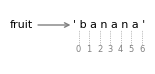

In [14]:
import matplotlib.pyplot as plt
from diagram import diagram, adjust
from matplotlib.transforms import Bbox

width, height, x, y = [1.35, 0.54, 0.23, 0.39]

ax = diagram(width, height)
bbox = binding.draw(ax, x, y)
bboxes = [bbox]

def draw_elts(x, y, elements):
    for elt in elements:
        bbox = elt.draw(ax, x, y, draw_value=False)
        bboxes.append(bbox)

        x1 = (bbox.xmin + bbox.xmax) / 2
        y1 = bbox.ymax + 0.02
        y2 = y1 + 0.14
        handle = plt.plot([x1, x1], [y1, y2], ':', lw=0.5, color='gray')
        x += 0.105
    
draw_elts(x + 0.48, y - 0.25, elements)
bbox = Bbox.union(bboxes)
# adjust(x, y, bbox)

例如切片`[3:6]`选中`ana`，因此`6`是切片中合法的一部分，但在索引中是不合法的。

如果你忽略第1个索引，切片从字符串的开头开始。

In [15]:
fruit[:3]

'ban'

如果你忽略第2个索引，切片会到达字符串的结尾：

In [16]:
fruit[3:]

'ana'

如果第1个索引大于等于第2个索引，获得的结果是**空字符串empty string**，用两个引号表示：

In [17]:
fruit[3:3]

''

空字符串不包含字符，长度为0。

你觉得`fruit[:]`代表的含义是什么？猜测之后执行下面的单元格。

In [18]:
fruit[:]

'banana'

译注：python序列支持更多切片方式，提供优雅的切片和索引越界处理方案。尝试`fruit[:10]`，`fruit[:-1]`和`fruit[::-1]`的结果。

## 字符串是不可变的

想要改变字符串的一个字符，在赋值语句的左边使用`[]`运算符很有诱惑：

In [19]:
%%expect TypeError

greeting = 'Hello, world!'
greeting[0] = 'J'

TypeError: 'str' object does not support item assignment

结果导致`TypeError`。在错误信息中，“object”对象是该字符串，“item”元素是我们想要赋值的字符。

目前，**对象object**与值等同，但我们稍后会完善这个定义。

产生这个错误的原因在于，字符串是**不可变的immutable**，你不能修改现存的字符串。最好的方式是创建一个新字符串。

In [20]:
new_greeting = 'J' + greeting[1:]
new_greeting

'Jello, world!'

这个例子将新的字母和`greeting`字符串的切片进行拼接。这对原始字符串没有影响。

In [21]:
greeting

'Hello, world!'

## 比较字符串

字符串支持关系运算符。我们可以使用`==`运算符比较两个字符串是否相等。

In [22]:
word = 'banana'

if word == 'banana':
    print('All right, banana.')

All right, banana.


其他关系运算符对于将单词按字母表顺序排序很有用：

In [23]:
def compare_word(word):
    if word < 'banana':
        print(word, '在banana之前。')
    elif word > 'banana':
        print(word, '在banana之后。')
    else:
        print('All right, banana.')

In [24]:
compare_word('apple')

apple 在banana之前。


Python比较大小写字母的方式与人们常做的不同。所有大写字母比小写字母“小”。

译注：在ASCII码表中，大写英文字母的编号小于小写字母。Python默认的UTF-8编码格式继承了该顺序，汉字按照康熙字典的偏旁部首和笔画数排序。

In [25]:
compare_word('Pineapple')

Pineapple 在banana之前。


要解决这个问题，我们可以将字符串转化为标准模式，例如在比较之前将所有字母都转化为小写。

如果你想免于手持菠萝的人的伤害，记住这一点。

## 字符串的方法

字符串提供各种有用的方法。方法与函数相同，接受参数，返回值，但语法不同。

例如，方法`upper`接受字符串，返回大写字母对应的字符串。调用方法不使用函数的语法`upper(word)`，而是采用`word.upper()`语法。

In [26]:
word = 'banana'
new_word = word.upper()
new_word

'BANANA'

这个例子使用点运算符，指名要应用方法的字符串名字`word`，以及方法的名字`upper`。空圆括号表示这个方法不接受参数。

方法的调用称为**调用invocation**，在这个例子里面，我们说我们在`word`上调用`upper`。

## 写入文件

字符串的运算符和方法对于读写文本文件很有用。例如我们将处理小说*德古拉Dracula*，它由Bram Stoker编写，可从古登堡项目获取(<https://www.gutenberg.org/ebooks/345>)。

In [ ]:
import os

if not os.path.exists('pg345.txt'):
    !wget https://www.gutenberg.org/cache/epub/345/pg345.txt

我已经下载了该小说的文本文件，文件名为`pg345.txt`，我们可以像这样读取：

In [28]:
reader = open('pg345.txt')

除了小说的文本，这个文件还在开头章节介绍书籍的信息，最后章节介绍协议的信息。在处理文本之前，我们可以移除额外的内容，它们以`'***'`开始。

接下来的函数接受一行字符串，检查字符串是否是这种特殊行。它使用`startswith`方法，检查字符串是否以给定字符串开始。

In [29]:
def is_special_line(line):
    return line.startswith('*** ')

We can use this function to loop through the lines in the file and print only the special lines.

In [30]:
for line in reader:
    if is_special_line(line):
        print(line.strip())

Now let's create a new file, called `pg345_cleaned.txt`, that contains only the text of the book.
In order to loop through the book again, we have to open it again for reading.
And, to write a new file, we can open it for writing.

In [31]:
reader = open('pg345.txt')
writer = open('pg345_cleaned.txt', 'w')

`open` takes an optional parameters that specifies the "mode" -- in this example, `'w'` indicates that we're opening the file for writing.
If the file doesn't exist, it will be created; if it already exists, the contents will be replaced.

As a first step, we'll loop through the file until we find the first special line.

In [32]:
for line in reader:
    if is_special_line(line):
        break

The `break` statement "breaks" out of the loop -- that is, it causes the loop to end immediately, before we get to the end of the file.

When the loop exits, `line` contains the special line that made the conditional true.

In [33]:
line

Because `reader` keeps track of where it is in the file, we can use a second loop to pick up where we left off.

The following loop reads the rest of the file, one line at a time.
When it finds the special line that indicates the end of the text, it breaks out of the loop.
Otherwise, it writes the line to the output file.

In [34]:
for line in reader:
    if is_special_line(line):
        break
    writer.write(line)

When this loop exits, `line` contains the second special line.

In [35]:
line

At this point `reader` and `writer` are still open, which means we could keep reading lines from `reader` or writing lines to `writer`.
To indicate that we're done, we can close both files by invoking the `close` method.

In [36]:
reader.close()
writer.close()

To check whether this process was successful, we can read the first few lines from the new file we just created.

In [37]:
for line in open('pg345_cleaned.txt'):
    line = line.strip()
    if len(line) > 0:
        print(line)
    if line.endswith('Stoker'):
        break

The `endswidth` method checks whether a string ends with a given sequence of characters.

## Find and replace

In the Icelandic translation of *Dracula* from 1901, the name of one of the characters was changed from "Jonathan" to "Thomas".
To make this change in the English version, we can loop through the book, use the `replace` method to replace one name with another, and write the result to a new file.

We'll start by counting the lines in the cleaned version of the file.

In [38]:
total = 0
for line in open('pg345_cleaned.txt'):
    total += 1
    
total

To see whether a line contains "Jonathan", we can use the `in` operator, which checks whether this sequence of characters appears anywhere in the line.

In [39]:
total = 0
for line in open('pg345_cleaned.txt'):
    if 'Jonathan' in line:
        total += 1

total

There are 199 lines that contain the name, but that's not quite the total number of times it appears, because it can appear more than once in a line.
To get the total, we can use the `count` method, which returns the number of times a sequence appears in a string.

In [40]:
total = 0
for line in open('pg345_cleaned.txt'):
    total += line.count('Jonathan')

total

Now we can replace `'Jonathan'` with `'Thomas'` like this:

In [41]:
writer = open('pg345_replaced.txt', 'w')

for line in open('pg345_cleaned.txt'):
    line = line.replace('Jonathan', 'Thomas')
    writer.write(line)

The result is a new file called `pg345_replaced.txt` that contains a version of *Dracula* where Jonathan Harker is called Thomas.

In [42]:
total = 0
for line in open('pg345_replaced.txt'):
    total += line.count('Thomas')

total

## Regular expressions

If we know exactly what sequence of characters we're looking for, we can use the `in` operator to find it and the `replace` method to replace it.
But there is another tool, called a **regular expression** that can also perform these operations -- and a lot more.

To demonstrate, I'll start with a simple example and we'll work our way up.
Suppose, again, that we want to find all lines that contain a particular word.
For a change, let's look for references to the titular character of the book, Count Dracula.
Here's a line that mentions him.

In [43]:
text = "I am Dracula; and I bid you welcome, Mr. Harker, to my house."

And here's the **pattern** we'll use to search.

In [44]:
pattern = 'Dracula'

A module called `re` provides functions related to regular expressions.
We can import it like this and use the `search` function to check whether the pattern appears in the text.

In [45]:
import re

result = re.search(pattern, text)
result

If the pattern appears in the text, `search` returns a `Match` object that contains the results of the search.
Among other information, it has a variable named `string` that contains the text that was searched.

In [46]:
result.string

It also provides a method called `group` that returns the part of the text that matched the pattern.

In [47]:
result.group()

And it provides a method called `span` that returns the index in the text where the pattern starts and ends.

In [48]:
result.span()

If the pattern doesn't appear in the text, the return value from `search` is `None`.

In [49]:
result = re.search('Count', text)
print(result)

So we can check whether the search was successful by checking whether the result is `None`.

In [50]:
result == None

Putting all that together, here's a function that loops through the lines in the book until it finds one that matches the given pattern, and returns the `Match` object.

In [51]:
def find_first(pattern):
    for line in open('pg345_cleaned.txt'):
        result = re.search(pattern, line)
        if result != None:
            return result

We can use it to find the first mention of a character.

In [52]:
result = find_first('Harker')
result.string

For this example, we didn't have to use regular expressions -- we could have done the same thing more easily with the `in` operator.
But regular expressions can do things the `in` operator cannot.

For example, if the pattern includes the vertical bar character, `'|'`, it can match either the sequence on the left or the sequence on the right.
Suppose we want to find the first mention of Mina Murray in the book, but we are not sure whether she is referred to by first name or last.
We can use the following pattern, which matches either name.

In [53]:
pattern = 'Mina|Murray'
result = find_first(pattern)
result.string

We can use a pattern like this to see how many times a character is mentioned by either name.
Here's a function that loops through the book and counts the number of lines that match the given pattern.

In [54]:
def count_matches(pattern):
    count = 0
    for line in open('pg345_cleaned.txt'):
        result = re.search(pattern, line)
        if result != None:
            count += 1
    return count

Now let's see how many times Mina is mentioned.

In [55]:
count_matches('Mina|Murray')

The special character `'^'` matches the beginning of a string, so we can find a line that starts with a given pattern.

In [56]:
result = find_first('^Dracula')
result.string

And the special character `'$'` matches the end of a string, so we can find a line that ends with a given pattern (ignoring the newline at the end).

In [57]:
result = find_first('Harker$')
result.string

## String substitution

Bram Stoker was born in Ireland, and when *Dracula* was published in 1897, he was living in England.
So we would expect him to use the British spelling of words like "centre" and "colour".
To check, we can use the following pattern, which matches either "centre" or the American spelling "center".

In [58]:
pattern = 'cent(er|re)'

In this pattern, the parentheses enclose the part of the pattern the vertical bar applies to.
So this pattern matches a sequence that starts with `'cent'` and ends with either `'er'` or `'re'`.

In [59]:
result = find_first(pattern)
result.string

As expected, he used the British spelling.

We can also check whether he used the British spelling of "colour".
The following pattern uses the special character `'?'`, which means that the previous character is optional.

In [60]:
pattern = 'colou?r'

This pattern matches either "colour" with the `'u'` or "color" without it.

In [61]:
result = find_first(pattern)
line = result.string
line

Again, as expected, he used the British spelling.

Now suppose we want to produce an edition of the book with American spellings.
We can use the `sub` function in the `re` module, which does **string substitution**.

In [62]:
re.sub(pattern, 'color', line)

The first argument is the pattern we want to find and replace, the second is what we want to replace it with, and the third is the string we want to search.
In the result, you can see that "colour" has been replaced with "color".

In [63]:
# I used this function to search for lines to use as examples

def all_matches(pattern):
    for line in open('pg345_cleaned.txt'):
        result = re.search(pattern, line)
        if result:
            print(line.strip())

In [64]:
# Here's the pattern I used (which uses some features we haven't seen)

names = r'(?<!\.\s)[A-Z][a-zA-Z]+'

all_matches(names)

## Debugging

When you are reading and writing files, debugging can be tricky.
If you are working in a Jupyter notebook, you can use **shell commands** to help.
For example, to display the first few lines of a file, you can use the command `!head`, like this:

In [65]:
!head pg345_cleaned.txt

The initial exclamation point, `!`, indicates that this is a shell command, which is not part of Python.
To display the last few lines, you can use `!tail`.

In [66]:
!tail pg345_cleaned.txt

When you are working with large files, debugging can be difficult because there might be too much output to check by hand.
A good debugging strategy is to start with just part of the file, get the program working, and then run it with the whole file.

To make a small file that contains part of a larger file, we can use `!head` again with the redirect operator, `>`, which indicates that the results should be written to a file rather than displayed.

In [67]:
!head pg345_cleaned.txt > pg345_cleaned_10_lines.txt

By default, `!head` reads the first 10 lines, but it takes an optional argument that indicates the number of lines to read.

In [68]:
!head -100 pg345_cleaned.txt > pg345_cleaned_100_lines.txt

This shell command reads the first 100 lines from `pg345_cleaned.txt` and writes them to a file called `pg345_cleaned_100_lines.txt`.

Note: The shell commands `!head` and `!tail` are not available on all operating systems.
If they don't work for you, we can write similar functions in Python.
See the first exercise at the end of this chapter for suggestions.

## Glossary

**sequence:**
 An ordered collection of values where each value is identified by an integer index.

**character:**
An element of a string, including letters, numbers, and symbols.

**index:**
 An integer value used to select an item in a sequence, such as a character in a string. In Python indices start from `0`.

**slice:**
 A part of a string specified by a range of indices.

**empty string:**
A string that contains no characters and has length `0`.

**object:**
 Something a variable can refer to. An object has a type and a value.

**immutable:**
If the elements of an object cannot be changed, the object is immutable.

**invocation:**
 An expression -- or part of an expression -- that calls a method.

**regular expression:**
A sequence of characters that defines a search pattern.

**pattern:**
A rule that specifies the requirements a string has to meet to constitute a match.

**string substitution:**
Replacement of a string, or part of a string, with another string.

**shell command:**
A statement in a shell language, which is a language used to interact with an operating system.

## Exercises

In [69]:
# 这个单元格让Jupyter在出现运行时故障时提供更多调试信息。
# 在进行练习前先运行本单元格。

%xmode Verbose

In [70]:
download('https://gitee.com/regentsai/Think_Python_3e_CN/blob/master/words.txt');

### Ask a virtual assistant

In this chapter, we only scratched the surface of what regular expressions can do.
To get an idea of what's possible, ask a virtual assistant, "What are the most common special characters used in Python regular expressions?"

You can also ask for a pattern that matches particular kinds of strings.
For example, try asking:

* Write a Python regular expression that matches a 10-digit phone number with hyphens.

* Write a Python regular expression that matches a street address with a number and a street name, followed by `ST` or `AVE`.

* Write a Python regular expression that matches a full name with any common title like `Mr` or `Mrs` followed by any number of names beginning with capital letters, possibly with hyphens between some names.

And if you want to see something more complicated, try asking for a regular expression that matches any legal URL.

A regular expression often has the letter `r` before the quotation mark, which indicates that it is a "raw string".
For more information, ask a virtual assistant, "What is a raw string in Python?"

In [71]:
from doctest import run_docstring_examples

def run_doctests(func):
    run_docstring_examples(func, globals(), name=func.__name__)

### Exercise

See if you can write a function that does the same thing as the shell command `!head`.
It should take as arguments the name of a file to read, the number of lines to read, and the name of the file to write the lines into.
If the third parameter is `None`, it should display the lines rather than write them to a file.

Consider asking a virtual assistant for help, but if you do, tell it not to use a `with` statement or a `try` statement.

In [72]:
# Solution goes here

You can use the following examples to test your function.

In [73]:
head('pg345_cleaned.txt', 10)

In [74]:
head('pg345_cleaned.txt', 100, 'pg345_cleaned_100_lines.txt')

In [75]:
!tail pg345_cleaned_100_lines.txt

### Exercise

"Wordle" is an online word game where the objective is to guess a five-letter word in six or fewer attempts.
Each attempt has to be recognized as a word, not including proper nouns.
After each attempt, you get information about which of the letters you guessed appear in the target word, and which ones are in the correct position.

For example, suppose the target word is `MOWER` and you guess `TRIED`.
You would learn that `E` is in the word and in the correct position, `R` is in the word but not in the correct position, and `T`, `I`, and `D` are not in the word.

As a different example, suppose you have guessed the words `SPADE` and `CLERK`, and you've learned that `E` is in the word, but not in either of those positions, and none of the other letters appear in the word.
Of the words in the word list, how many could be the target word?
Write a function called `check_word` that takes a five-letter word and checks whether it could be the target word, given these guesses.

In [76]:
# Solution goes here

You can use any of the functions from the previous chapter, like `uses_any`.

In [77]:
def uses_any(word, letters):
    for letter in word.lower():
        if letter in letters.lower():
            return True
    return False

You can use the following loop to test your function.

In [78]:
for line in open('words.txt'):
    word = line.strip()
    if len(word) == 5 and check_word(word):
        print(word)

### Exercise

Continuing the previous exercise, suppose you guess the work `TOTEM` and learn that the `E` is *still* not in the right place, but the `M` is. How many words are left?

In [79]:
# Solution goes here

In [80]:
# Solution goes here

### Exercise

*The Count of Monte Cristo* is a novel by Alexandre Dumas that is considered a classic.
Nevertheless, in the introduction of an English translation of the book, the writer Umberto Eco confesses that he found the book to be "one of the most badly written novels of all time".

In particular, he says it is "shameless in its repetition of the same adjective," and mentions in particular the number of times "its characters either shudder or turn pale."

To see whether his objection is valid, let's count the number number of lines that contain the word `pale` in any form, including `pale`, `pales`, `paled`, and `paleness`, as well as the related word `pallor`. 
Use a single regular expression that matches any of these words.
As an additional challenge, make sure that it doesn't match any other words, like `impale` -- you might want to ask a virtual assistant for help.

The following cell downloads the book from Project Gutenberg <https://www.gutenberg.org/ebooks/1184>.

In [81]:
import os

if not os.path.exists('pg1184.txt'):
    !wget https://www.gutenberg.org/cache/epub/1184/pg1184.txt

The following cell runs a function that reads the file from Project Gutenberg and writes a file that contains only the text of the book, not the added information about the book.

In [82]:
def clean_file(input_file, output_file):
    reader = open(input_file)
    writer = open(output_file, 'w')

    for line in reader:
        if is_special_line(line):
            break

    for line in reader:
        if is_special_line(line):
            break
        writer.write(line)
        
    reader.close()
    writer.close()

clean_file('pg1184.txt', 'pg1184_cleaned.txt')

In [83]:
# Solution goes here

In [84]:
# Solution goes here

In [85]:
# Solution goes here

By this count, these words appear on `223` lines of the book, so Mr. Eco might have a point.

[Think Python: 3rd Edition](https://allendowney.github.io/ThinkPython/index.html)

Copyright 2024 [Allen B. Downey](https://allendowney.com)

Code license: [MIT License](https://mit-license.org/)

Text license: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)